# Naive Bayes Classifier

The idea of this project is to create a classifier for wines, using as a database the information chemical analysis of wines grown in the same region in Italy.

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 
import warnings
warnings.filterwarnings('ignore')

## Configure Matplotlib

In [2]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

## Load data

In [3]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
df_wine.columns = ['Class', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids',
                      'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
# Variables
print("Wine dataset has {} data points with {} variables each.".format(*df_wine.shape))

Wine dataset has 177 data points with 14 variables each.


## Data description

This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

The dataset consists of 177 individuals data. There are 14 columns in the dataset.

Type - The type of wine, into one of three classes, 1 (59 obs), 2(71 obs), and 3 (48 obs).

Alcohol - Alcohol

Malic - Malic acid

Ash - 
Ash

Alcalinity - Alcalinity of ash

Magnesium - Magnesium

Phenols - Total phenols

Flavanoids - Flavanoids

Nonflavanoids - Nonflavanoid phenols

Proanthocyanins - Proanthocyanins

Color - Color intensity.

Hue - Hue

Dilution - D280/OD315 of diluted wines.

Proline - Proline

## Explore data

In [4]:
df_wine.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
# data types of columns
df_wine.dtypes

Class                int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [6]:
# Check missing value
df_wine.isnull().sum()

Class              0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

## Prepare Dataset for Modeling

In [7]:
# Check what percentage of each column's data is missing
df_wine.isnull().sum()/len(df_wine)

Class              0.0
Alcohol            0.0
Malic              0.0
Ash                0.0
Alcalinity         0.0
Magnesium          0.0
Phenols            0.0
Flavanoids         0.0
Nonflavanoids      0.0
Proanthocyanins    0.0
Color              0.0
Hue                0.0
Dilution           0.0
Proline            0.0
dtype: float64

## Descriptive Statistics

In [8]:
df_wine.describe()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Class distribution

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

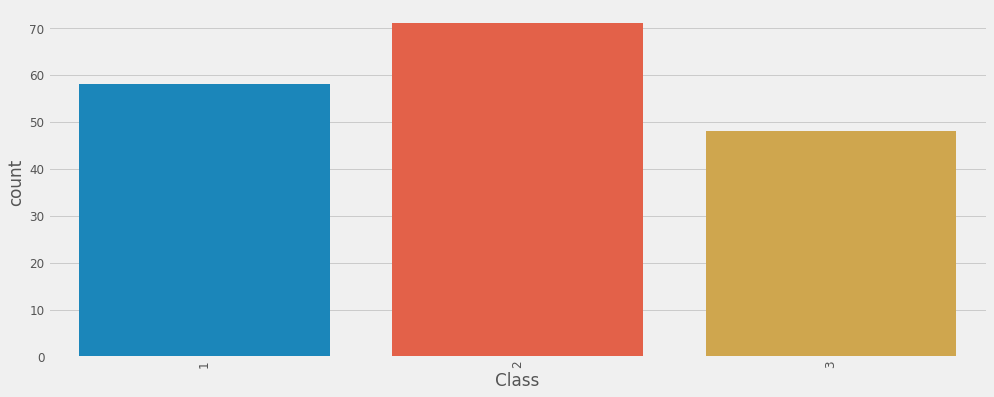

In [9]:
sns.countplot(data=df_wine, x = 'Class')
plt.xticks(rotation=90)

## Check Multicollinearity

In [10]:
# Steps to remove redundant values
mask = np.zeros_like(df_wine.corr())
mask[np.triu_indices_from(mask)] = True

## Correlation Matrix

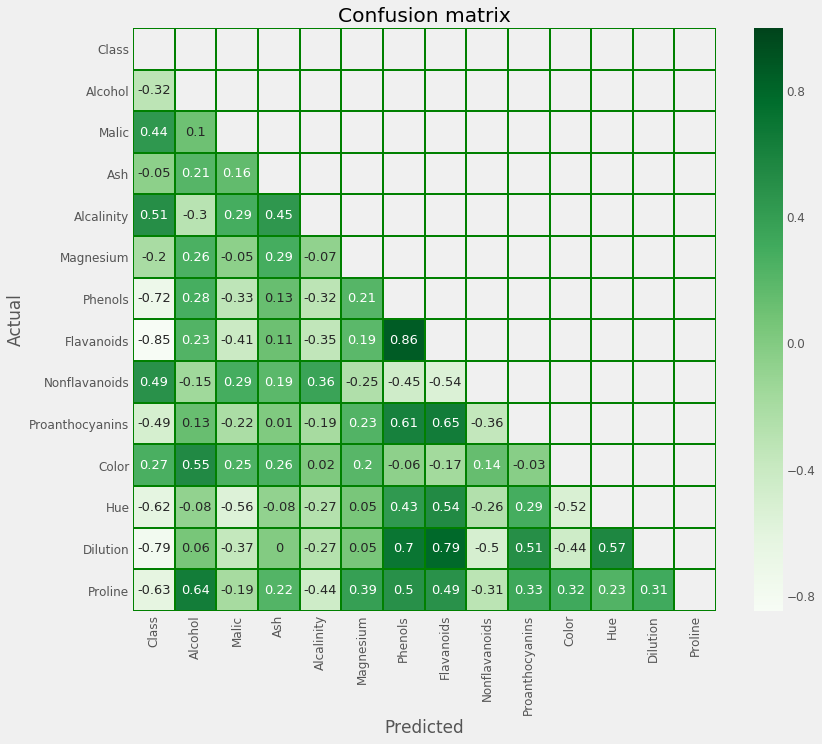

In [11]:
matplotlib.rcParams['figure.figsize'] = 12,10
ax = sns.heatmap(df_wine.corr().round(2), square=True, cmap='Greens', annot=True, linecolor='Green', linewidths=1.0, mask=mask,annot_kws={"size": 13});
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Shuffle and Split Data

In [12]:
X = df_wine.drop(['Class'], axis=1).values
y = df_wine["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Create Model

In [13]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Testing the Model

In [14]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print(y_pred[:5])

[1 3 2 1 2]


## Evaluating Model

In [15]:
print("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


## Classification Report

In [16]:
print()
print("Classification Report is:\n\n",classification_report(y_test,y_pred))


Classification Report is:

               precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## Plotting the confusion matrix

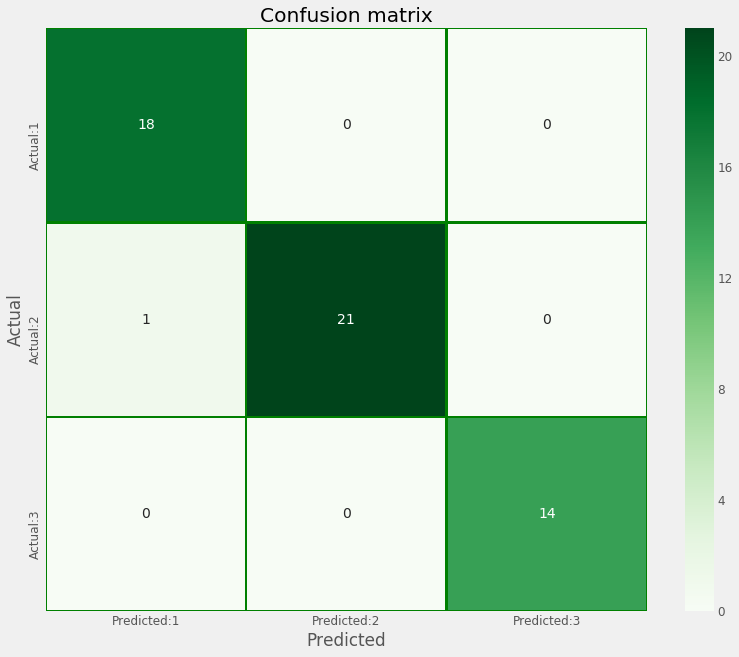

In [17]:
cm_test = confusion_matrix(y_pred, y_test)
conf_matrix = pd.DataFrame(data = cm_test,  
                           columns = ['Predicted:1', 'Predicted:2', 'Predicted:3'],  
                           index =['Actual:1', 'Actual:2', 'Actual:3']) 
matplotlib.rcParams['figure.figsize'] = 12,10
ax = sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Green", linewidths=1.5, annot_kws={"size": 14}) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()